In [31]:
#importing packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [32]:
avocadoData_analysis = pd.read_csv('~/Desktop/CompleteDataAnalysis/AvocadoPricesAnalysis/avocado.csv')

In [33]:
#df.info() gives you the complete information of the entire dataset
avocadoData_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [34]:
#The Other way of finding whether the dataset has null values is by using the isnull() function

print(avocadoData_analysis.isnull().sum())

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64


In [35]:
#To delete the columns with the missing data we can do 
# axis = 1 removes the entire column and axis = 0 just removes the null rows
updated_avocadoData = avocadoData_analysis.dropna(axis=1)

In [36]:
updated_avocadoData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [37]:
# To delete just null rows 
updated_df_avocadoData = updated_avocadoData.dropna(axis=0)

In [38]:
updated_df_avocadoData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [39]:
# Performing Chi Square tests between date and region so that we try to see if 
# relationships are Significant 

date_region_cTab = pd.crosstab(updated_df_avocadoData['Date'], updated_df_avocadoData['region'])

chi2, p, dof, expected = chi2_contingency(date_region_cTab)

print(f"Chi-Square Statistic between date and region is: {chi2}")
print(f"P-value betweeen date and region is: {p}")
print(f"Degrees of Freedom between date and region is: {dof}")
print("Expected Frequencies between date and region is:")
print(expected)

# Based on the values there is no significant relationship between variables date and region

Chi-Square Statistic between date and region is: 1.4724319562393753
P-value betweeen date and region is: 1.0
Degrees of Freedom between date and region is: 8904
Expected Frequencies between date and region is:
[[2.00032879 2.00032879 2.00032879 ... 2.00032879 2.00032879 1.98257439]
 [2.00032879 2.00032879 2.00032879 ... 2.00032879 2.00032879 1.98257439]
 [2.00032879 2.00032879 2.00032879 ... 2.00032879 2.00032879 1.98257439]
 ...
 [2.00032879 2.00032879 2.00032879 ... 2.00032879 2.00032879 1.98257439]
 [2.00032879 2.00032879 2.00032879 ... 2.00032879 2.00032879 1.98257439]
 [2.00032879 2.00032879 2.00032879 ... 2.00032879 2.00032879 1.98257439]]


Top 3 correlated pairs:
Small Bags - Total Bags: 0.9943
Large Bags - Total Bags: 0.9430
4225 - 4046: 0.9261


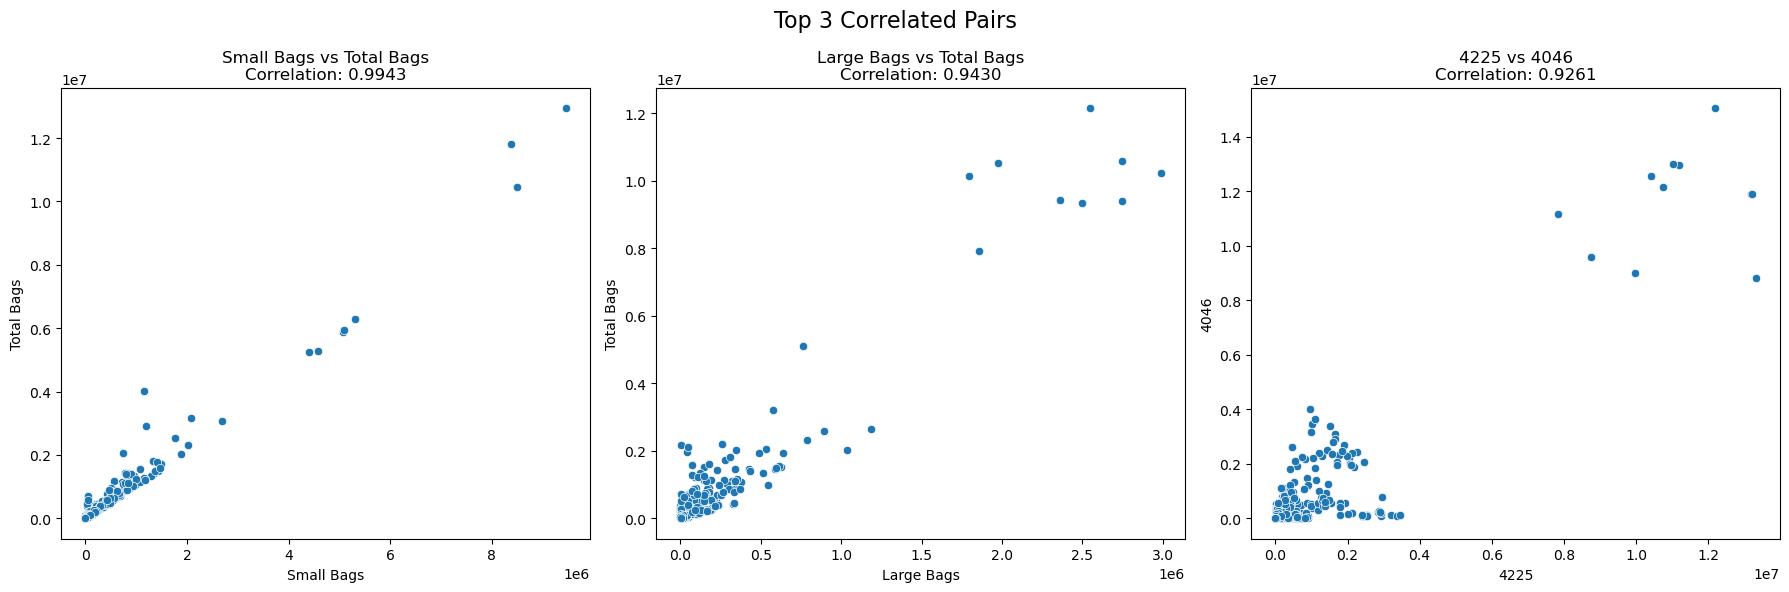

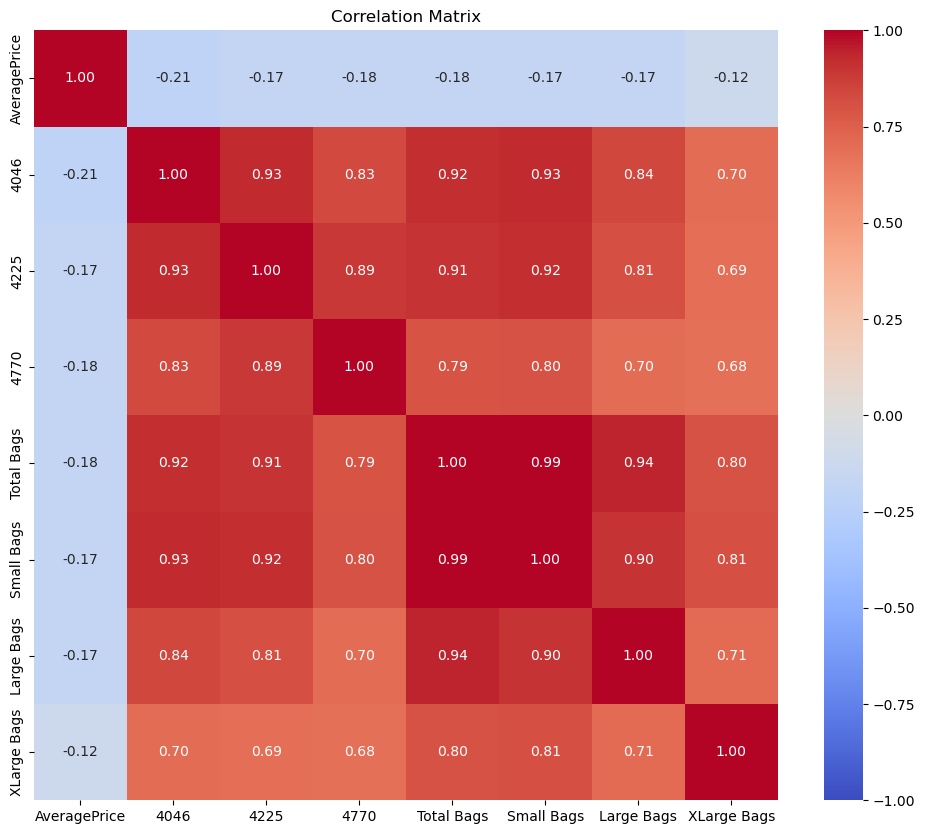

In [40]:
numeric_cols = ['AveragePrice', 'TotalVolume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'Year']

numeric_cols = [col for col in numeric_cols if col in updated_df_avocadoData.columns]

# Compute correlation matrix
corr_matrix = updated_df_avocadoData[numeric_cols].corr()

# Get upper triangle of correlation matrix
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find the top 3 correlations
top_correlations = upper_tri.unstack().sort_values(kind="quicksort", ascending=False)[:3]

# Print top 3 correlations
print("Top 3 correlated pairs:")
for (col1, col2), corr in top_correlations.items():
    print(f"{col1} - {col2}: {corr:.4f}")

# Visualize top 3 correlations
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle("Top 3 Correlated Pairs", fontsize=16)

for i, ((col1, col2), corr) in enumerate(top_correlations.items()):
    sns.scatterplot(data=updated_df_avocadoData.sample(1000), x=col1, y=col2, ax=axes[i])  # Sample 1000 points for faster plotting
    axes[i].set_title(f"{col1} vs {col2}\nCorrelation: {corr:.4f}")

plt.tight_layout()
plt.show()

# Correlation matrix heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

# The top 3 correlated pairs includes 

# Top 3 correlated pairs:
# Small Bags - Total Bags: 0.9943
# Large Bags - Total Bags: 0.9430
# 4225 - 4046: 0.9261